In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Подключаем Dataset

In [2]:
data = pd.read_csv('cwurData.csv', sep=",")

Размер набора данных

In [3]:
data.shape

(2200, 14)

Типы колонок

In [4]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

Проверяем, есть ли пропущенные значения

In [5]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Первые 5 строк датасета

In [6]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


Процент пропусков в board_impact 

In [8]:
(200 / 2000) * 100

10.0

Настройка отображения графиков

In [9]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4

## Обработка пропусков данных

 Очистка строк

Можно очистить строки, содержащие пропуски. При этом останутся данные только за 2014 и 2015 гг (см. описание датасета)


In [10]:
# Удаление строк, содержащих пустые значения
data_no_null = data.dropna(axis=0, how='any')
(data.shape, data_no_null.shape)

((2200, 14), (2000, 14))

Выведем первые 11 строк, чтобы убедиться, что данные в national_rank числовые (Jupyter Lab в предпросмотре CSV показывает не совсем верно)

In [11]:
data_no_null.head(11)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [12]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


# Внедрение значений

In [14]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col
, dt, temp_null_count, temp_perc))

Колонка broad_impact. Тип данных float64. Количество пустых значений 200, 10.0%.


In [15]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2195,969.0
2196,981.0
2197,975.0
2198,975.0


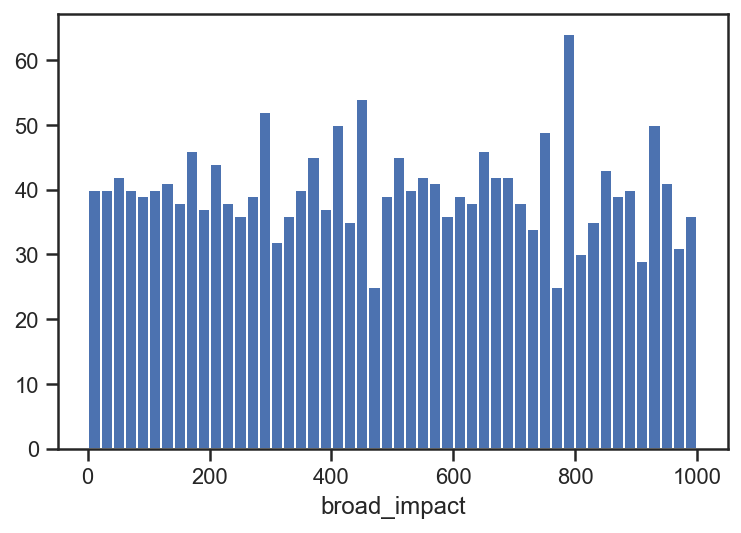

In [17]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [18]:
data_num_MasVnrArea = data_num[['broad_impact']]
data_num_MasVnrArea.head()

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [20]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

С помощью класса SimpleImputer проверим импьютацию различными показателями центра распределения

In [21]:
strategies=['mean', 'median', 'most_frequent']

In [23]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 4

In [25]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 4

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 

In [31]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [32]:
data[['broad_impact']].describe()

,broad_impact
count,2000.000000
mean,496.699500
std,286.919755
min,1.000000
25%,250.500000
50%,496.000000
75%,741.000000
max,1000.000000


In [33]:
test_num_impute_col(data, 'broad_impact', strategies[0])

('broad_impact', 'mean', 200, 496.6995, 496.6995)

In [34]:
test_num_impute_col(data, 'broad_impact', strategies[1])

('broad_impact', 'median', 200, 496.0, 496.0)

In [35]:
test_num_impute_col(data, 'broad_impact', strategies[2])

('broad_impact', 'most_frequent', 200, 642.0, 642.0)

# Кодирование категориальных признаков

Преобразуем названия стран, городов, ... в числовые зеачения (label encoding)


In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
le = LabelEncoder()
institution_le = le.fit_transform(data_no_null['institution'])

In [38]:
data_no_null['institution'].unique()

array(['Harvard University', 'Stanford University',
       'Massachusetts Institute of Technology', ...,
       'Babeș-Bolyai University', 'Henan Normal University',
       'Southwest Jiaotong University'], dtype=object)

In [39]:
arr_institution_encoded = np.unique(institution_le)
arr_institution_encoded

array([   0,    1,    2, ..., 1020, 1021, 1022])

In [40]:
le.inverse_transform([n for n in range(1023)])

array(['AGH University of Science and Technology', 'Aalborg University',
       'Aalto University', ..., 'École normale supérieure de Cachan',
       'École normale supérieure de Lyon', 'Örebro University'],
      dtype=object)

In [41]:
le_country = LabelEncoder()
country_le = le_country.fit_transform(data_no_null['country'])

In [42]:
data_no_null['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'Russia', 'China', 'Taiwan',
       'Sweden', 'Singapore', 'Denmark', 'Germany', 'Netherlands',
       'Italy', 'Belgium', 'Australia', 'Finland', 'Norway',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [43]:
np.unique(country_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

In [44]:
le_country.inverse_transform([n for n in range(59)])

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Puerto Rico',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay'], dtype=object)

In [45]:
le_country.inverse_transform([n for n in range(59)])

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Puerto Rico',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay'], dtype=object)

In [46]:
data_no_null.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


In [47]:
data_digit = data_no_null.copy()
#data_digit.pop('institution')
#data_digit.pop('country')
data_digit["institution"] = institution_le
data_digit['country'] = country_le
data_digit

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,184,54,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,511,54,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,312,54,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,637,57,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,819,57,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,954,37,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,11,14,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,132,4,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,576,48,40,367,567,218,886,974,812,975.0,651,44.02,2015


Проверяем типы данных

In [49]:
data_digit.dtypes

world_rank                int64
institution               int64
country                   int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

# Масштабирование данных

Масштабирование пудем проводить на data_dight (где нет категориальных признаков)

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#### MinMax масштабирование

=====>world_rank<=====


In [51]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[['broad_impact']])

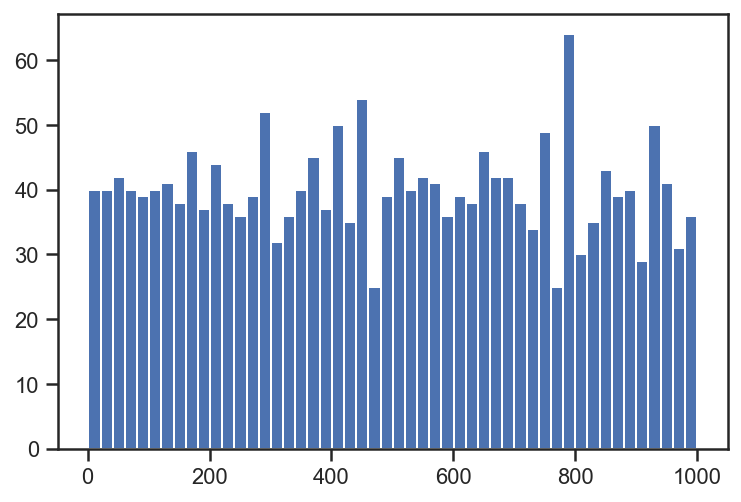

In [52]:
plt.hist(data_digit['broad_impact'], 50)
plt.show()

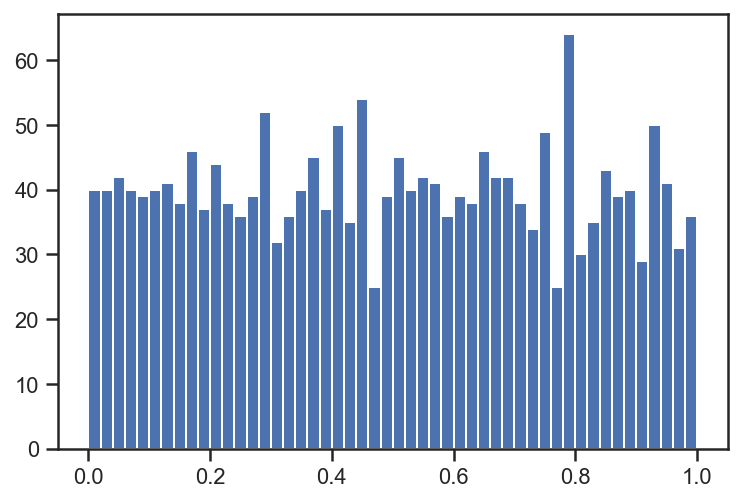

In [53]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [54]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_digit[['broad_impact']])

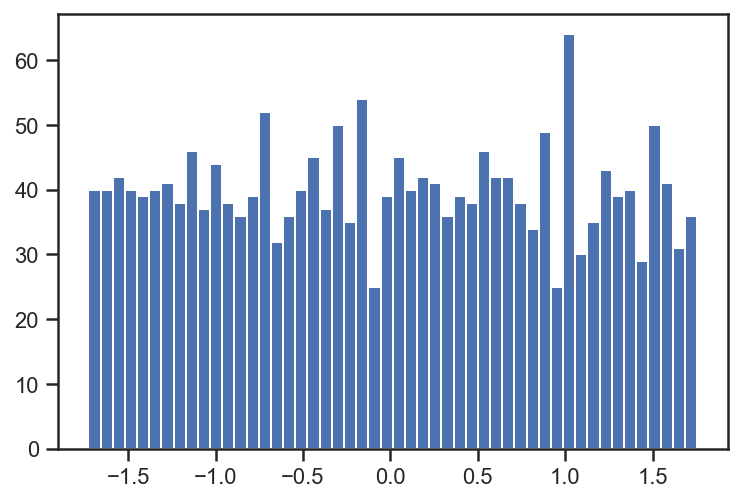

In [55]:
plt.hist(sc2_data, 50)
plt.show()